<a href="https://colab.research.google.com/github/sisomimoctrl/asset-allocation/blob/main/talmud_spy_tlt_vnq_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bt yfinance quantstats

     |████████████████████████████████| 2.7 MB 8.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 41 kB 275 kB/s 
     |████████████████████████████████| 6.4 MB 32.8 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Created wheel for bt: filename=bt-0.2.9-cp37-cp37m-linux_x86_64.whl size=765298 sha256=8beb6289c1ec997ad6a5f3e4b775f80fb249699655bdbbe564739c3379b6ceda
  Stored in directory: /root/.cache/pip/wheels/c5/1a/3f/b56e6064b766c107f25e200969161c09ca6868cbfe0eaa31e4
Successfully built bt
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take 

In [ ]:
import bt
import yfinance as yf
import pandas as pd
import quantstats as qs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
tickers = ['spy', 'tlt', 'vnq']
df = yf.download(tickers, end='2022-4-30')['Adj Close']

df.info()

[*********************100%***********************]  3 of 3 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7367 entries, 1993-01-29 to 2022-04-29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     7367 non-null   float64
 1   TLT     4974 non-null   float64
 2   VNQ     4428 non-null   float64
dtypes: float64(3)
memory usage: 230.2 KB


In [ ]:
for c in df.columns:
    print(c, df[c].first_valid_index(), ',', df[c].last_valid_index())

SPY 1993-01-29 00:00:00 , 2022-04-29 00:00:00
TLT 2002-07-30 00:00:00 , 2022-04-29 00:00:00
VNQ 2004-09-29 00:00:00 , 2022-04-29 00:00:00


In [ ]:
start = '2005-1-1'
end = '2022-4-30'

data = df[start:].copy()

In [ ]:
print(data.corr())
print(data.resample('M').last().corr())

          SPY       TLT       VNQ
SPY  1.000000  0.872846  0.962447
TLT  0.872846  1.000000  0.886975
VNQ  0.962447  0.886975  1.000000
          SPY       TLT       VNQ
SPY  1.000000  0.872199  0.962818
TLT  0.872199  1.000000  0.886490
VNQ  0.962818  0.886490  1.000000


In [ ]:
def long_only_ew(name, data, tickers, initial_capital=100000000.0):
    s = bt.Strategy(
        name, 
        [bt.algos.RunOnce(),
         bt.algos.SelectThese(tickers),
         bt.algos.WeighEqually(),
         bt.algos.Rebalance()])
    t = bt.Backtest(s, data, initial_capital=initial_capital)
    return t 

def strategy_talmud(name, data, tickers, initial_capital=100000000.0):
    s = bt.Strategy(        
        name, 
        [bt.algos.RunYearly(
            run_on_first_date=True, 
            run_on_end_of_period=True, 
            run_on_last_date=False),
         bt.algos.SelectThese(tickers),
         bt.algos.WeighEqually(),
         bt.algos.PrintDate(),
         bt.algos.PrintTempData(),
         bt.algos.Rebalance()])
    t = bt.Backtest(s, data, initial_capital=initial_capital)
    return t

bt_spy = long_only_ew('SPY', data, ['SPY'])
bt_talmud = strategy_talmud('Talmud', data, ['SPY', 'TLT','VNQ'])

res = bt.run(bt_talmud, bt_spy)

2005-01-03 00:00:00
{'selected': ['SPY', 'TLT', 'VNQ'], 'weights': {'SPY': 0.3333333333333333, 'TLT': 0.3333333333333333, 'VNQ': 0.3333333333333333}}
2005-12-30 00:00:00
{'selected': ['SPY', 'TLT', 'VNQ'], 'weights': {'SPY': 0.3333333333333333, 'TLT': 0.3333333333333333, 'VNQ': 0.3333333333333333}}
2006-12-29 00:00:00
{'selected': ['SPY', 'TLT', 'VNQ'], 'weights': {'SPY': 0.3333333333333333, 'TLT': 0.3333333333333333, 'VNQ': 0.3333333333333333}}
2007-12-31 00:00:00
{'selected': ['SPY', 'TLT', 'VNQ'], 'weights': {'SPY': 0.3333333333333333, 'TLT': 0.3333333333333333, 'VNQ': 0.3333333333333333}}
2008-12-31 00:00:00
{'selected': ['SPY', 'TLT', 'VNQ'], 'weights': {'SPY': 0.3333333333333333, 'TLT': 0.3333333333333333, 'VNQ': 0.3333333333333333}}
2009-12-31 00:00:00
{'selected': ['SPY', 'TLT', 'VNQ'], 'weights': {'SPY': 0.3333333333333333, 'TLT': 0.3333333333333333, 'VNQ': 0.3333333333333333}}
2010-12-31 00:00:00
{'selected': ['SPY', 'TLT', 'VNQ'], 'weights': {'SPY': 0.3333333333333333, 'TLT'

In [ ]:
res.display()

Stat                 Talmud      SPY
-------------------  ----------  ----------
Start                2005-01-02  2005-01-02
End                  2022-04-29  2022-04-29
Risk-free rate       0.00%       0.00%

Total Return         312.51%     379.05%
Daily Sharpe         0.67        0.56
Daily Sortino        1.05        0.87
CAGR                 8.53%       9.47%
Max Drawdown         -39.51%     -55.19%
Calmar Ratio         0.22        0.17

MTD                  -7.40%      -8.78%
3m                   -7.87%      -6.49%
6m                   -10.29%     -9.69%
YTD                  -13.98%     -12.99%
1Y                   -1.24%      -0.63%
3Y (ann.)            8.80%       13.77%
5Y (ann.)            8.35%       13.52%
10Y (ann.)           8.70%       13.55%
Since Incep. (ann.)  8.53%       9.47%

Daily Sharpe         0.67        0.56
Daily Sortino        1.05        0.87
Daily Mean (ann.)    9.11%       10.93%
Daily Vol (ann.)     13.58%      19.36%
Daily Skew           -0.31       -0.07

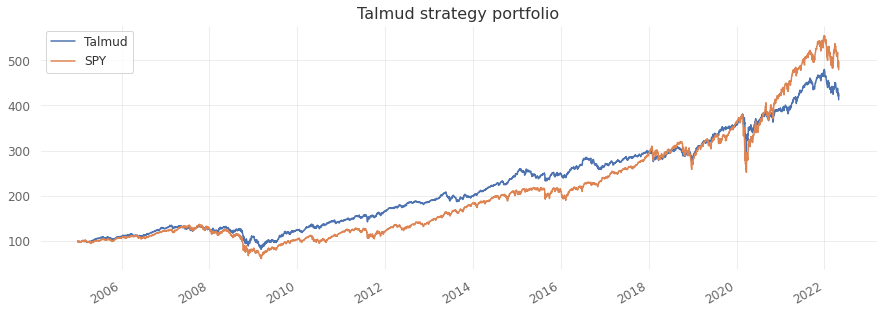

In [ ]:
res.plot()
plt.title('Talmud strategy portfolio', fontsize=16)
plt.legend(ncol=1)
plt.show()

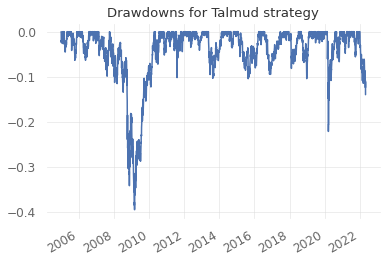

In [ ]:
res.backtests['Talmud'].stats.drawdown[:].plot()
plt.title('Drawdowns for Talmud strategy')
plt.show()

In [ ]:
res.backtests['Talmud'].stats.drawdown_details.sort_values(by='drawdown', ascending=True).head(5)

,Start,End,Length,drawdown
44,2007-10-08 00:00:00,2010-04-23 00:00:00,928,-0.395137
211,2020-02-24 00:00:00,2020-08-04 00:00:00,162,-0.221436
252,2022-01-03 00:00:00,2022-04-29 00:00:00,116,-0.139838
149,2015-01-27 00:00:00,2016-03-29 00:00:00,427,-0.104394
180,2018-08-30 00:00:00,2019-02-15 00:00:00,169,-0.10427


In [ ]:
res.backtests['Talmud'].stats.drawdown_details.sort_values(by='Length', ascending=False).head(5)

,Start,End,Length,drawdown
44,2007-10-08 00:00:00,2010-04-23 00:00:00,928,-0.395137
149,2015-01-27 00:00:00,2016-03-29 00:00:00,427,-0.104394
161,2016-08-01 00:00:00,2017-06-22 00:00:00,325,-0.094859
114,2013-05-22 00:00:00,2014-02-25 00:00:00,279,-0.103555
43,2007-02-21 00:00:00,2007-10-05 00:00:00,226,-0.098794


In [ ]:
res.display_monthly_returns()

  Year     Jan     Feb    Mar    Apr    May    Jun    Jul    Aug    Sep     Oct    Nov    Dec     YTD
------  ------  ------  -----  -----  -----  -----  -----  -----  -----  ------  -----  -----  ------
  2005   -1.97    1.18  -1.32   2.55   3.29   2.32   2.43  -0.59  -0.53   -2.5    3.08   0.91    8.98
  2006    2.87    1.19   0.74  -1.65  -2.06   2.21   2.22   2.93   2.19    3.53   3.15  -1.07   17.28
  2007    3.1    -0.51  -0.9    1.72   0.27  -3.82  -2.62   3.07   2.63    1.74  -2.51  -2.18   -0.35
  2008   -1.58   -2.05   2.62   2.79  -0.5   -5.59   0.65   2.25  -2.37  -16.58  -2.4   10.97  -13.28
  2009  -12.94  -10.77   5.44   9.55   1.84  -0.87   6.5    6.87   4.36   -3.04   5      1.83   11.56
  2010   -2.15    2.7    4.68   4.06  -2.89  -1.44   4.91   1.09   3.16    1.24  -1.22   2.5    17.49
  2011    0.83    3.31  -0.54   3.69   1.17  -2.45   1.29  -0.53  -0.89    5.79  -0.59   3.16   14.84
  2012    3.56    0.23   1.56   2.18  -0.94   2.65   2.31   0.39  -0.6    -1.09   